# Rozhodovací stromy: Učení se rozhodovat pomocí otázek

## Cíl lekce

Po dokončení této lekce budete:
- **Rozumět principu rozhodovacích stromů** jako sérii otázek vedoucích k rozhodnutí
- **Znát anatomii stromu** - kořen, uzly, větve, listy
- **Umět ručně nakreslit** jednoduchý rozhodovací strom

## Co je rozhodovací strom?

Rozhodovací strom je algoritmus, který se **rozhoduje pomocí série otázek** - přesně jako vy v běžném životě.

### Příklad: Půjdu dnes ven?

```
        Prší?
       /     \
     ANO      NE
      |        |
 Mám deštník? Je teplo?
    /   \      /    \
  ANO   NE   ANO    NE
   |     |    |      |
  Jdu  Nejdu Jdu   Nejdu
```

To je rozhodovací strom! Každá otázka vede k dalším otázkám nebo k finálnímu rozhodnutí.

## Anatomie stromu

### Základní části:

1. **Kořen** - první otázka ("Prší?")
2. **Uzly** - další otázky ("Mám deštník?")
3. **Větve** - možné odpovědi (ANO/NE)
4. **Listy** - finální rozhodnutí ("Jdu"/"Nejdu")

### Jednoduché schéma:

```
     [KOŘEN]
     /      \
  [uzel]   [uzel]
   /  \     /  \
 list list list list
```

## Praktický příklad: Projde student zkouškou?

### Dataset: 6 studentů

| Student | Hodiny učení | Účast (%) | Výsledek |
|---------|-------------|-----------|----------|
| A | 5 | 90 | Projde ✅ |
| B | 4 | 85 | Projde ✅ |
| C | 2 | 70 | Neprojde ❌ |
| D | 1 | 60 | Neprojde ❌ |
| E | 3 | 75 | Projde ✅ |
| F | 2 | 95 | Neprojde ❌ |

## Ruční konstrukce stromu

### Krok 1: Najít nejlepší otázku

Zkusíme otázku: **"Hodiny učení > 2?"**

- **ANO (>2):** A(✅), B(✅), E(✅) → všichni projdou
- **NE (≤2):** C(❌), D(❌), F(❌) → nikdo neprojde

**Perfektní rozdělení!** ✨

### Krok 2: Náš strom

```
    [Hodiny > 2?]
      /        \
    ANO         NE
     |           |
  (Projde)   (Neprojde)
   A,B,E       C,D,F
```

### Krok 3: Predikce pro nového studenta

**Nový student:** 3.5 hodiny učení
- Otázka: "Hodiny > 2?" → ANO
- **Predikce: Projde** ✅

## Výhody rozhodovacích stromů

### 1. Srozumitelnost
Vidíme přesně, jak algoritmus rozhoduje. Můžeme vysvětlit: "Student neprojde, protože se učil méně než 2 hodiny."

### 2. Jednoduchost
Nepotřebuje škálování dat ani složitou přípravu.

### 3. Rychlost
Predikce je velmi rychlá - jen projdeme cestou stromem.

## Typy rozhodovacích stromů

### Klasifikační strom
- Předpovídá **kategorii** (Projde/Neprojde, Ano/Ne)
- V listech: nejčastější třída

### Regresní strom
- Předpovídá **číslo** (známka: 1.5, cena: 50000 Kč)
- V listech: průměr hodnot

## Import knihoven

Nyní, když rozumíme teorii, můžeme importovat knihovny pro vizualizaci:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Nastavení pro hezčí grafy
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

## Vizualizace našeho stromu

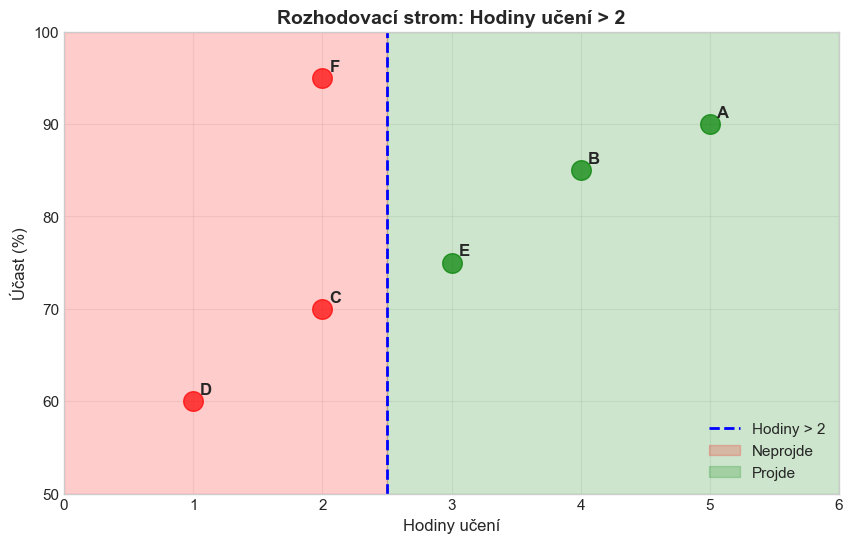

In [2]:
# Data našich 6 studentů
students = {
    'A': {'hodiny': 5, 'ucast': 90, 'vysledek': 1},
    'B': {'hodiny': 4, 'ucast': 85, 'vysledek': 1},
    'C': {'hodiny': 2, 'ucast': 70, 'vysledek': 0},
    'D': {'hodiny': 1, 'ucast': 60, 'vysledek': 0},
    'E': {'hodiny': 3, 'ucast': 75, 'vysledek': 1},
    'F': {'hodiny': 2, 'ucast': 95, 'vysledek': 0}
}

# Převod na arrays
hodiny = np.array([s['hodiny'] for s in students.values()])
ucast = np.array([s['ucast'] for s in students.values()])
vysledky = np.array([s['vysledek'] for s in students.values()])
jmena = list(students.keys())

# Vizualizace dat a rozhodovací hranice
fig, ax = plt.subplots(figsize=(10, 6))

# Vykreslení studentů
colors = ['red' if v == 0 else 'green' for v in vysledky]
for i, (h, u, c, name) in enumerate(zip(hodiny, ucast, colors, jmena)):
    ax.scatter(h, u, c=c, s=200, alpha=0.7)
    ax.annotate(name, (h, u), xytext=(5, 5), 
                textcoords='offset points', fontsize=12, fontweight='bold')

# Rozhodovací hranice (hodiny > 2)
ax.axvline(x=2.5, color='blue', linestyle='--', linewidth=2, label='Hodiny > 2')

# Obarvení oblastí
ax.fill_betweenx([50, 100], 0, 2.5, alpha=0.2, color='red', label='Neprojde')
ax.fill_betweenx([50, 100], 2.5, 6, alpha=0.2, color='green', label='Projde')

# Popisky
ax.set_xlabel('Hodiny učení', fontsize=12)
ax.set_ylabel('Účast (%)', fontsize=12)
ax.set_title('Rozhodovací strom: Hodiny učení > 2', fontsize=14, fontweight='bold')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 6)
ax.set_ylim(50, 100)

plt.show()

C:\Users\petrrozkosny\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\petrrozkosny\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


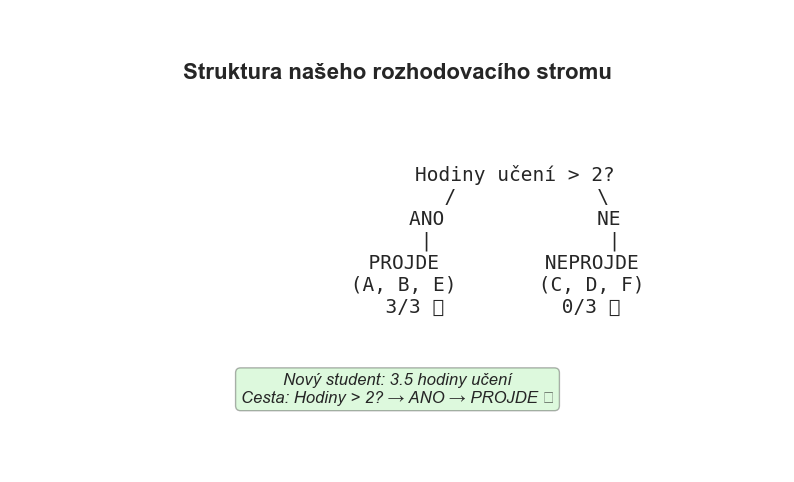

In [3]:
# Jednoduchá vizualizace stromu pomocí textu
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Struktura stromu
tree_structure = """
                    Hodiny učení > 2?
                      /            \\
                    ANO             NE
                     |               |
                  PROJDE         NEPROJDE
                 (A, B, E)       (C, D, F)
                  3/3 ✅          0/3 ❌
"""

# Vykreslení textu
ax.text(0.5, 0.5, tree_structure, fontsize=14, 
        ha='center', va='center', family='monospace')

# Titulek
ax.text(0.5, 0.85, 'Struktura našeho rozhodovacího stromu', 
        fontsize=16, ha='center', fontweight='bold')

# Test nového studenta
test_text = """Nový student: 3.5 hodiny učení
Cesta: Hodiny > 2? → ANO → PROJDE ✅"""

ax.text(0.5, 0.15, test_text, fontsize=12, 
        ha='center', style='italic', 
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))

plt.show()

## Shrnutí

### Co jsme se naučili:

1. **Rozhodovací strom** = série otázek vedoucích k rozhodnutí
2. **Struktura:** kořen → uzly → větve → listy
3. **Výhoda:** snadné pochopení a vysvětlení
4. **Použití:** klasifikace (kategorie) nebo regrese (čísla)

### Praktická rada:
Rozhodovací stromy jsou skvělé pro začátek s machine learningem, protože jsou intuitivní a snadno interpretovatelné!